In [1]:
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter

In C:\Users\geoimpactadmin\.conda\envs\nn_env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\geoimpactadmin\.conda\envs\nn_env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\geoimpactadmin\.conda\envs\nn_env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\geoimpactadmin\.conda\envs\nn_env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\geoimpac

In [2]:
# Load pronovo data:
pv_df = pd.read_csv('../data/oehd_pronovo.csv', on_bad_lines='skip')

pv_df

C:\Users\geoimpactadmin\.conda\envs\nn_env\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (4,5,6,20,21,42,43,44,46,47,48,63,64,65,69,72) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,kev_nr,auditdatum,kev_ibm_formular_beg_datum,kev_ibm_meldung_komlpett_datum,kev_zweitkontrolle_datum,erweiterung_von_projekt,vnb_interne_id,plz,ort,kanton,...,gultig_bis_10,qualitatsmerkmal_6,gultig_von_11,gultig_bis_11,qualitatsmerkmal_7,gultig_von_12,gultig_bis_12,qualitatsmerkmal_8,gultig_von_13,gultig_bis_13
0,7316,11.04.2017,01.05.2018,02.07.2018,16.01.2020 16:48,NaN,NaN,9247,Henau,SG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18755,15.10.2013,31.03.2014,31.03.2014,20.04.2018 10:40,NaN,NaN,8753,Mollis,GL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20695,05.03.2015,25.03.2015,25.03.2015,21.04.2015 10:29,NaN,NaN,6648,Minusio,TI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22948,13.04.2015,22.03.2016,22.03.2016,23.03.2016 10:42,NaN,NaN,2000,Neuchâtel,NE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24003,05.08.2011,04.10.2013,04.10.2013,27.11.2014 14:59,NaN,658298 / RU,1872,Troistorrents,VS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136300,20090588,25.01.2023,13.02.2023,27.02.2023,NaN,NaN,NaN,1218,Le Grand-Saconnex,GE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136301,20093046,16.02.2023,07.03.2023,07.03.2023,NaN,NaN,NaN,8832,Wollerau,SZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136302,20093193,16.02.2023,10.03.2023,10.03.2023,NaN,NaN,NaN,1219,Châtelaine,GE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136303,20094246,01.02.2023,28.02.2023,02.03.2023,NaN,NaN,NaN,8107,Buchs,ZH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
pv_df.columns

Index(['kev_nr', 'auditdatum', 'kev_ibm_formular_beg_datum',
       'kev_ibm_meldung_komlpett_datum', 'kev_zweitkontrolle_datum',
       'erweiterung_von_projekt', 'vnb_interne_id', 'plz', 'ort', 'kanton',
       'land', 'realisierte_leistung_erstinbetriebnahme',
       'realisierte_leistung_inkl_erweiterungen', 'nettomesspunkt',
       'produktionsmesspunkt', 'eigenbedarfsmesspunkt', 'uberschussmesspunkt',
       'eigenverbrauchsmesspunkt_vergeben', 'production_device_id', 'hkn_nr',
       'speicherkraftwerk', 'pumpbetrieb', 'lastgangmessung_vorhanden',
       'inkasso_marktpreis_abrechnen_als',
       'automatische_produktionsdatenmeldung', 'geplantes_inbetriebnahmedatum',
       'inbetriebnahme', 'konzession', 'letztes_auditdatum',
       'jahresproduktion', 'technologie_code', 'alternativer_technologie_code',
       'support_type', 'gultig_von', 'gultig_bis', 'support_schema',
       'gultig_von_2', 'gultig_bis_2', 'anlagenstatus_kev', 'periodizitat',
       'gultig_von_3', 'gultig

In [4]:
pv_df['auditdatum'] = pd.to_datetime(pv_df['auditdatum'], format='%d.%m.%Y')
pv_df['kev_ibm_formular_beg_datum'] = pd.to_datetime(pv_df['kev_ibm_formular_beg_datum'], format='%d.%m.%Y')
pv_df['kev_ibm_meldung_komlpett_datum'] = pd.to_datetime(pv_df['kev_ibm_meldung_komlpett_datum'], format='%d.%m.%Y')
pv_df['kev_zweitkontrolle_datum'] = pd.to_datetime(pv_df['kev_zweitkontrolle_datum'].str[:10], format='%d.%m.%Y')
pv_df['inbetriebnahme'] = pd.to_datetime(pv_df['inbetriebnahme'], format='%Y-%m-%d')
pv_df[['kev_ibm_meldung_komlpett_datum', 'inbetriebnahme', 'realisierte_leistung_inkl_erweiterungen']]

,kev_ibm_meldung_komlpett_datum,inbetriebnahme,realisierte_leistung_inkl_erweiterungen
0,2018-07-02,2018-03-23,10.45
1,2014-03-31,2013-06-25,11.25
2,2015-03-25,2015-03-05,5.88
3,2016-03-22,2009-07-06,15.08
4,2013-10-04,2011-06-08,4.05
...,...,...,...
136300,2023-02-27,2023-01-12,6.97
136301,2023-03-07,2022-12-22,96.76
136302,2023-03-10,2023-01-20,13.53
136303,2023-03-02,2022-12-15,20.25


In [5]:
pv_df['realisierte_leistung_inkl_erweiterungen'].sum()
pd.to_datetime('2010-01-01')

pv_df[[
    'kev_ibm_formular_beg_datum', 'kev_ibm_meldung_komlpett_datum', 'kev_zweitkontrolle_datum',
    'inbetriebnahme', 'realisierte_leistung_inkl_erweiterungen'
]].agg({
    'kev_ibm_formular_beg_datum': ['min', 'max', 'count'],
    'kev_ibm_meldung_komlpett_datum': ['min', 'max', 'count'],
    'kev_zweitkontrolle_datum': ['min', 'max', 'count'],
    'inbetriebnahme': ['min', 'max', 'count'],
    'realisierte_leistung_inkl_erweiterungen': ['min', 'max', 'sum']
})

,kev_ibm_formular_beg_datum,kev_ibm_meldung_komlpett_datum,kev_zweitkontrolle_datum,inbetriebnahme,realisierte_leistung_inkl_erweiterungen
min,2013-02-25 00:00:00,2013-02-25 00:00:00,2014-07-01 00:00:00,1989-12-11 00:00:00,0.00
max,2023-07-24 00:00:00,2023-07-06 00:00:00,2023-08-18 00:00:00,2023-04-25 00:00:00,6425.60
count,130342,135246,102327,136304,NaN
sum,NaN,NaN,NaN,NaN,2804473.67


In [10]:
elstat_df = pd.read_csv('../data/installed_capacity_sfoe.csv', on_bad_lines='skip')
elstat_df['Begin'] = pd.to_datetime(elstat_df['Begin'].str[:10], format='%d.%m.%Y')

elstat_df

,Begin,SFOE,EQ,Estimate
0,2008-01-01,37.4,35.00,False
1,2008-02-01,38.4,35.92,True
2,2008-03-01,39.4,36.83,True
3,2008-04-01,40.4,37.75,True
4,2008-05-01,41.4,38.67,True
...,...,...,...,...
200,2024-09-01,7200.0,6049.00,True
201,2024-10-01,7325.0,6124.00,True
202,2024-11-01,7450.0,6199.00,True
203,2024-12-01,7575.0,6274.00,True


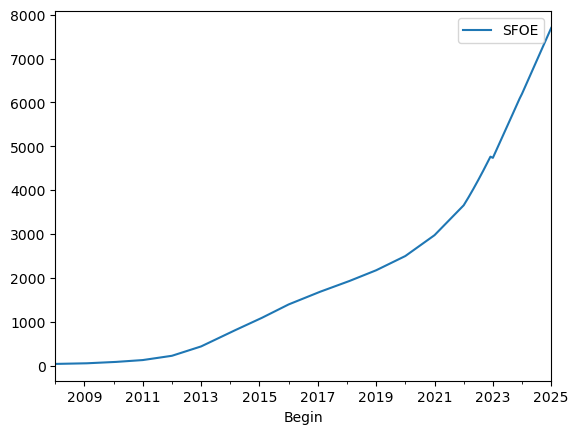

In [27]:
df = elstat_df[['Begin', 'SFOE']].set_index('Begin').plot()


plt.show()

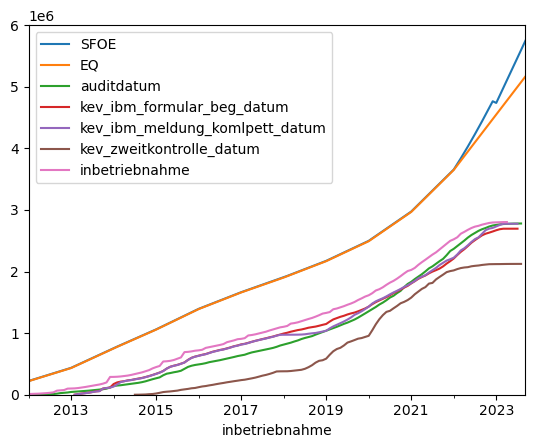

In [59]:
# Plot all dates:

cols = [
    'auditdatum', 
    'kev_ibm_formular_beg_datum', 
    'kev_ibm_meldung_komlpett_datum', 
    'kev_zweitkontrolle_datum',
    'inbetriebnahme'
]

fig, axes = plt.subplots()

df = elstat_df[['Begin', 'SFOE']].set_index('Begin').multiply(1000)
df.index = df.index.to_period('m')
df.plot(ax=axes)

df = elstat_df[['Begin', 'EQ']].set_index('Begin').multiply(1000)
df.index = df.index.to_period('m')
df.plot(ax=axes)


for col in cols:
    df = pv_df[[col, 'realisierte_leistung_inkl_erweiterungen']] \
        .groupby(col).realisierte_leistung_inkl_erweiterungen.sum()
    df = df[(df.index>=pd.to_datetime('2010-01-01')) & df.index.notna()]
    df = df.groupby(df.index.to_period('m')).sum().cumsum()
    df.plot()

plt.ylim((0, 6000000))
plt.xlim((pd.to_datetime('2012-01-01'), pd.to_datetime('2023-09-01')))
plt.legend(['SFOE', 'EQ']+cols)
plt.show()

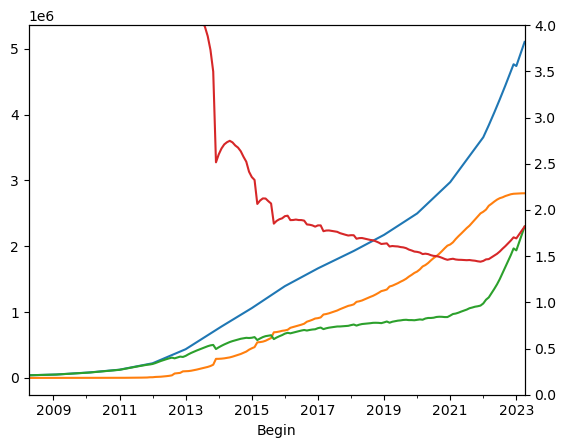

In [87]:
df_sfoe = elstat_df[['Begin', 'SFOE']].set_index('Begin').multiply(1000)#.squeeze(axis=0)
df_sfoe.index = df_sfoe.index.to_period('m')
df_sfoe = df_sfoe.reset_index()

df_inbetr = pv_df[['inbetriebnahme', 'realisierte_leistung_inkl_erweiterungen']] \
    .groupby('inbetriebnahme').realisierte_leistung_inkl_erweiterungen.sum()
df_inbetr = df_inbetr.groupby(df_inbetr.index.to_period('m')).sum().cumsum()

df_diff = df_sfoe.merge(df_inbetr, right_on='inbetriebnahme', left_on='Begin').set_index('Begin')

df_diff['diff'] = df_diff['SFOE'] - df_diff['realisierte_leistung_inkl_erweiterungen']
df_diff['factor'] = df_diff['SFOE']/df_diff['realisierte_leistung_inkl_erweiterungen']

df_diff['SFOE'].plot()
df_diff['realisierte_leistung_inkl_erweiterungen'].plot()
df_diff['diff'].plot()
df_diff['factor'].plot(secondary_y = True)

plt.ylim((0, 4))

plt.show()

# Analyse Timelag over Time

C:\Users\geoimpactadmin\.conda\envs\nn_env\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: casting period[M] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.


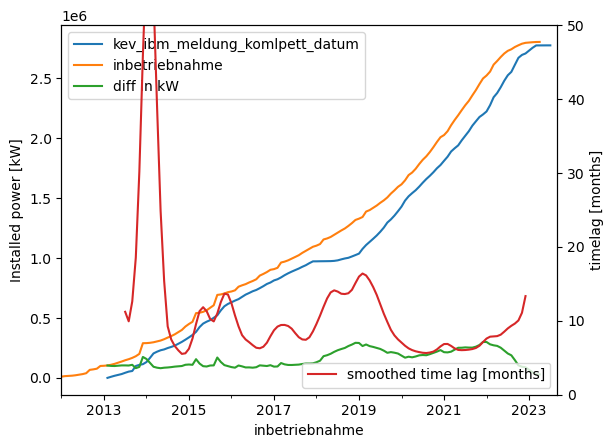

In [161]:
# Plot all dates:

df_komplett = pv_df[['kev_ibm_meldung_komlpett_datum', 'realisierte_leistung_inkl_erweiterungen']] \
    .groupby('kev_ibm_meldung_komlpett_datum').realisierte_leistung_inkl_erweiterungen.sum()
df_komplett = df_komplett.groupby(df_komplett.index.to_period('m')).sum().cumsum()

df_inbetr = pv_df[['inbetriebnahme', 'realisierte_leistung_inkl_erweiterungen']] \
    .groupby('inbetriebnahme').realisierte_leistung_inkl_erweiterungen.sum()
df_inbetr = df_inbetr.groupby(df_inbetr.index.to_period('m')).sum().cumsum()

df_diff = df_inbetr - df_komplett

df_komplett.plot()
df_inbetr.plot()
df_diff.plot()
plt.legend([
    'kev_ibm_meldung_komlpett_datum', 
    'inbetriebnahme',
    'diff in kW'
], loc=3)
plt.ylabel('Installed power [kW]')

df_inbetr_diff = df_inbetr.diff() / df_inbetr.index.to_series().astype(int).diff()
df_timelag_smoothed = (df_diff / df_inbetr_diff).rolling(window=10, win_type="gaussian", center=True).mean(std=2)

df_timelag_smoothed.plot(secondary_y = True)

plt.ylim((0, 50))
plt.ylabel('timelag [months]')
plt.xlim((pd.to_datetime('2012-01-01'), pd.to_datetime('2023-09-01')))
plt.legend([
    'smoothed time lag [months]'
], loc=4)
plt.show()

# Analyse Timelag by Kanton

avg timelag [month]: -7.3380156999027975


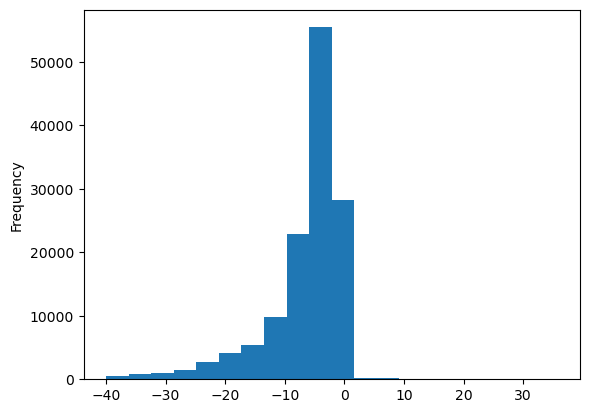

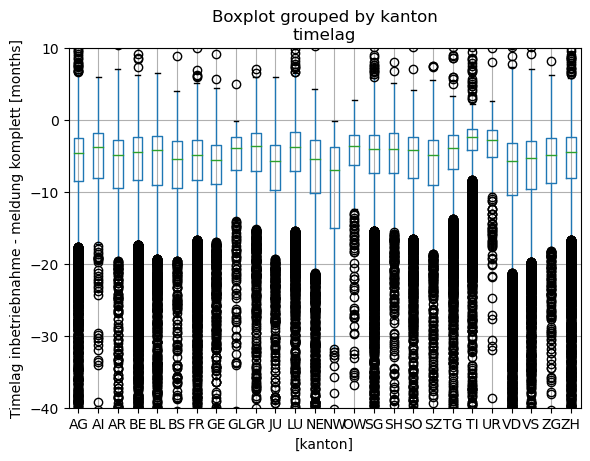

In [162]:
pv_df['timelag'] = (pv_df['inbetriebnahme'] - pv_df['kev_ibm_meldung_komlpett_datum']).dt.days/30
df_timelag = pv_df[['kanton', 'timelag']]

print(f"avg timelag [month]: {df_timelag['timelag'].mean()}")

df_timelag.loc[df_timelag['timelag'].abs()<40, 'timelag'].plot.hist(bins=20)

df_timelag.boxplot(by='kanton')

plt.ylabel('Timelag inbetriebnahme - meldung komplett [months]')
plt.ylim((-40, 10))

plt.show()